# Experimental Design for Compton Scattering

This notebook produces figure 2 in the main text of _Designing Optimal Experiments: An Application to Proton Compton Scattering_ by Jordan Melendez, Dick Furnstahl, Harald Grießhammer, Judith McGovern, Daniel Phillips, and Matt Pratola  (see [[arXiv:2004.11307]](https://arxiv.org/abs/2004.11307)). 
The figures are output to `./manuscript_figures/`.
All the other figures can be found in the `./main_manuscript_analysis.ipynb` and `./plot_compton_coefficients.ipynb` notebooks.
Most of the detailed code resides in the `compton` package.

This notebook uses modules from standard Python packages, plotly, and the local `compton` package (install from the root directory of the repository with `pip install -e .`). 


<!-- #### Table of contents

1. [Expansion parameters](#expansion_parameters)
1. [EFT transition figure (fig. 2)](#eft_transition)
 -->

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import scipy as sp
from scipy.special import expit
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import pandas as pd
from itertools import product

from compton import expansion_parameter, expansion_parameter_cm
from compton import mass_proton, mass_neutron, alpha_fine, hbarc, fm2_to_nb
from compton import setup_rc_params
from compton import order_transition_old, order_transition_lower_orders, order_transition_truncation

## Set up the defaults for figures

Set up global plot settings.

In [2]:
setup_rc_params()

## EFT transition figure<a id="eft_transition"></a>

In [3]:
x = np.linspace(0, 350, 100)
orders = np.array([0, 2, 3, 4, 5])
truncation_order = order_transition_truncation(5, x, 1)

Make figure 2 in arXiv:2004.11307.

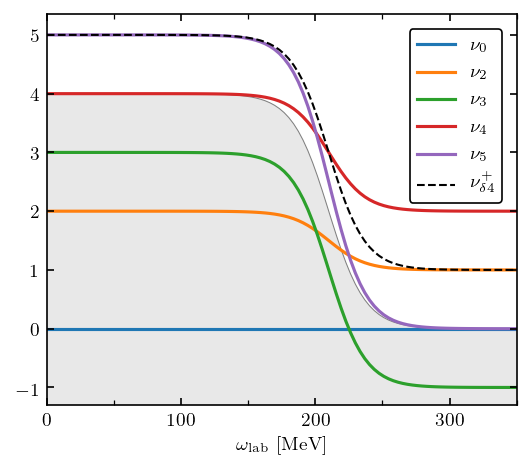

In [4]:
fig, ax = plt.subplots(figsize=(3.4, 3))

for order in orders:
    ax.plot(x, order_transition_lower_orders(order, x), label=fr'$\nu_{{{order}}}$', zorder=order/5)

# The first incomplete order
ax.plot(x, truncation_order, c='k', ls='--', lw=1, label=r'$\nu_{\delta 4}^+$', zorder=2)

# Plot the gray region where EFT is complete
ax.fill_between(
    x, -2*np.ones(x.shape), truncation_order-1,
    facecolor='lightgrey', alpha=0.5, zorder=-1
)
ax.plot(x, truncation_order-1, c='gray', lw=0.5, zorder=-1)

# Styling
ax.set_xlabel(r'$\omega_{\rm lab}$ [MeV]')
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.legend()
ax.tick_params(right=True, top=True, direction='in', which='both')
ax.set_xlim(x[0], x[-1])
ax.set_ylim(-1.3, None)
fig.savefig('manuscript_figures/eft_order_transition.png')